In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

To perform Kmeans and Hierarchical Clustering

In [2]:
data = pd.read_csv("C:\\Users\\amaan\\Desktop\\Sem 6 All notebooks\\Datasets\\wine-clustering.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.shape

(178, 13)

In [7]:
data.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  

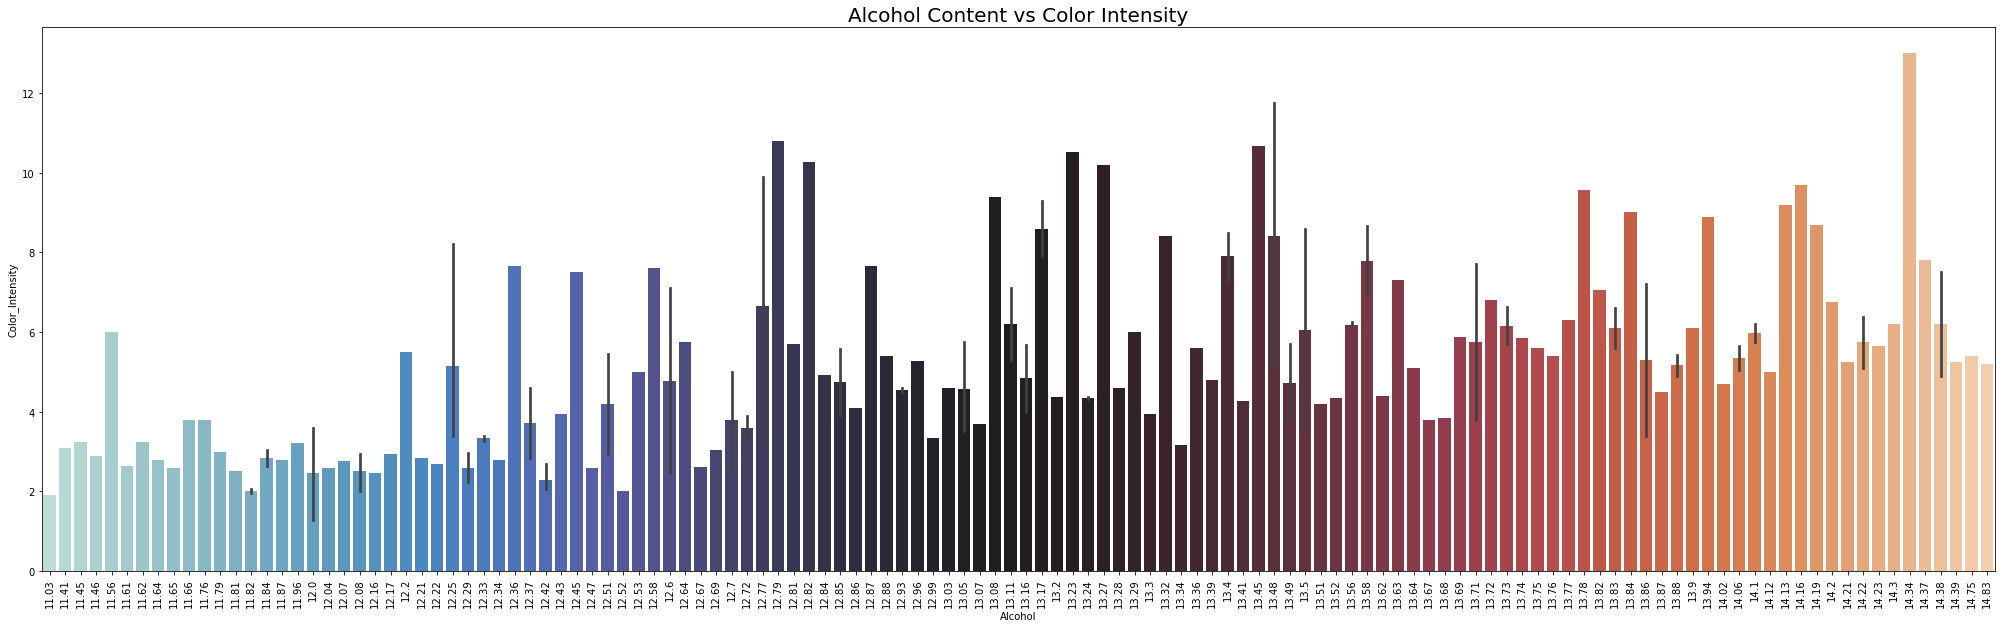

In [16]:
#Plotting Alcohol content vs Color Intensity
plt.figure(figsize=(35,10))
# Passing X axis and Y axis along with subplot position
plt.title('Alcohol Content vs Color Intensity', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = data['Alcohol'] , y = data['Color_Intensity'] , palette='icefire');

Text(0.5, 1.0, 'Pairplot for data')

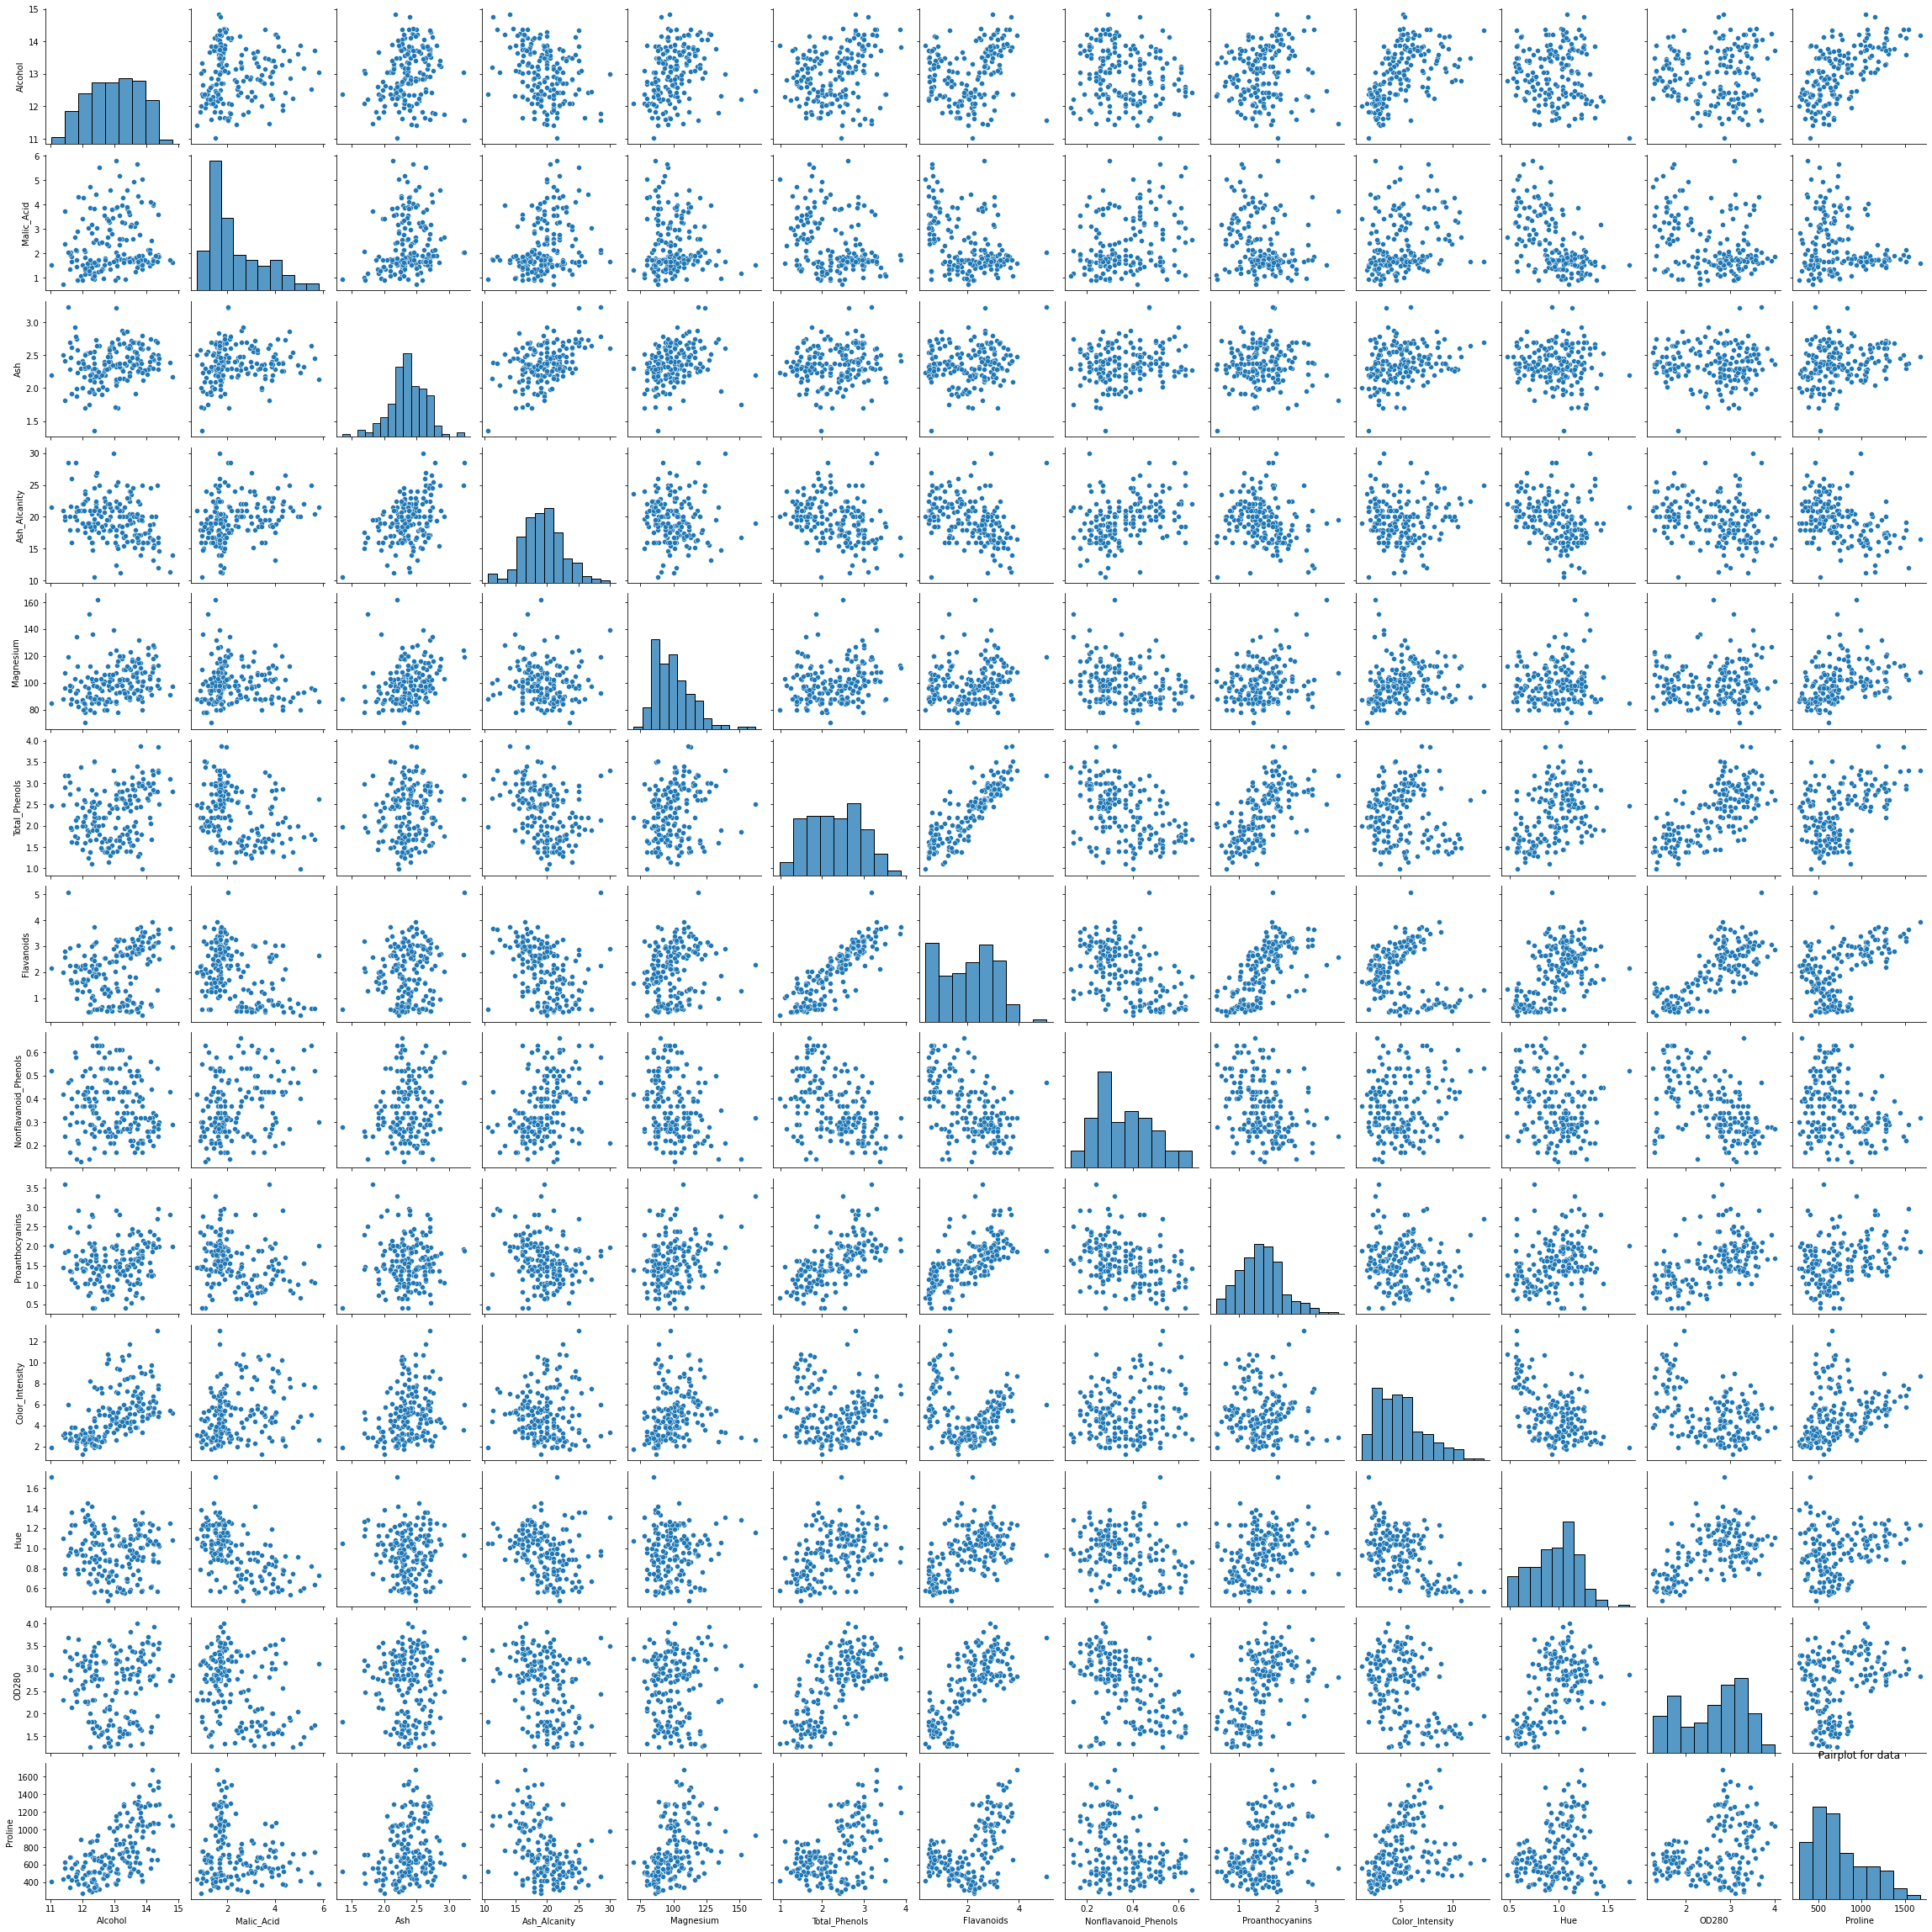

In [17]:
sns.pairplot(data)

<AxesSubplot:>

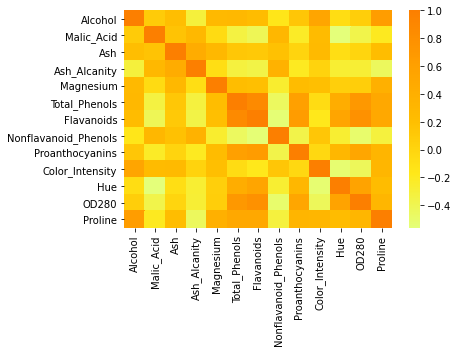

In [19]:
sns.heatmap(data.corr(), cmap = 'Wistia')

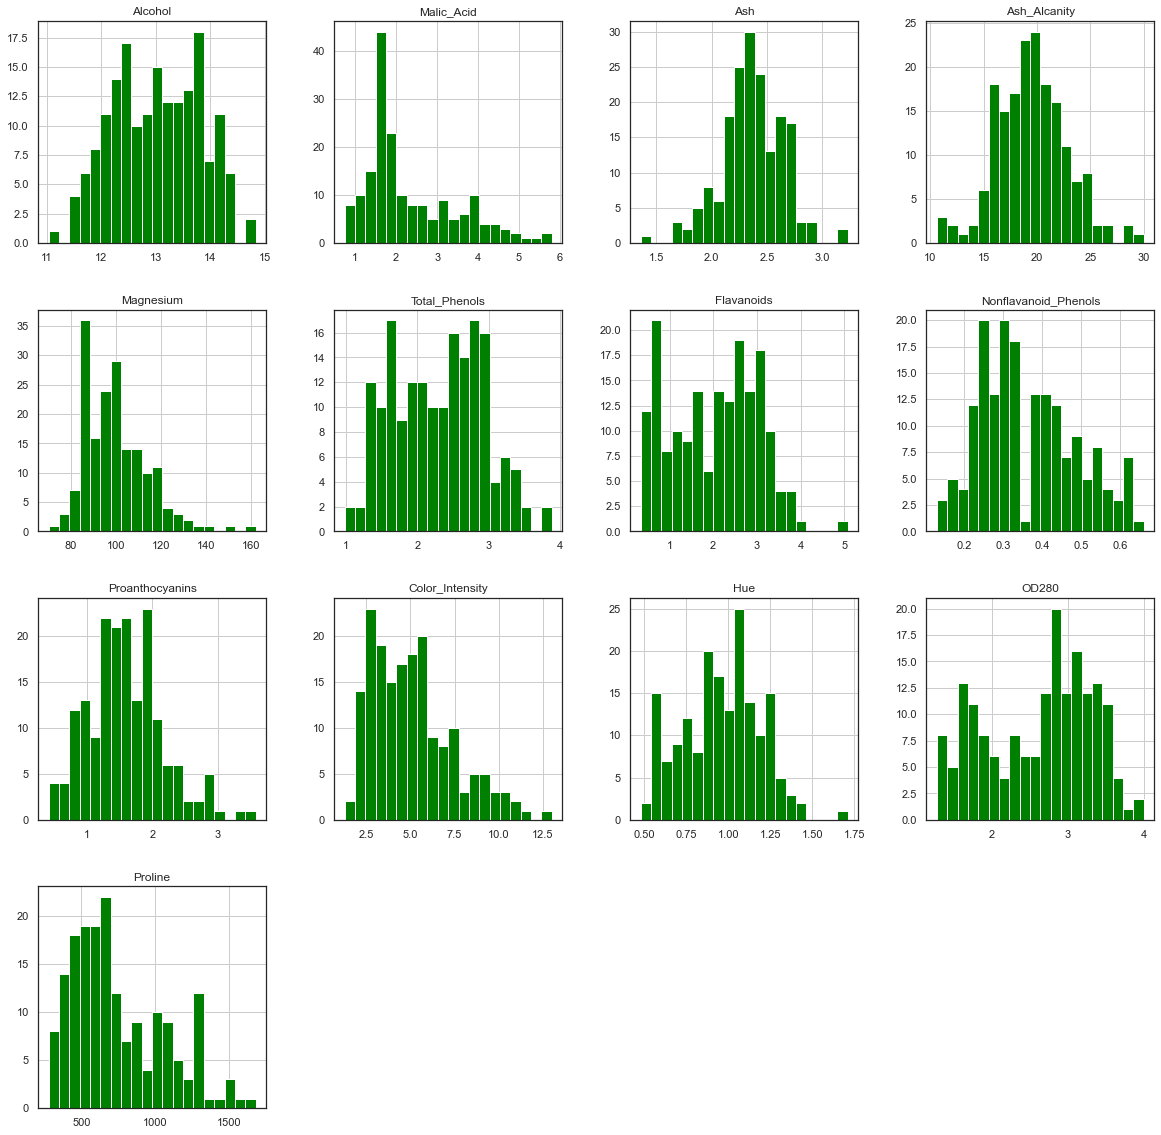

In [23]:
sns.set(style = 'white', rc = {'figure.figsize':(20,20)})
ax = data.hist(bins = 20, color = 'green')

## K means Clustering

C:\Users\amaan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


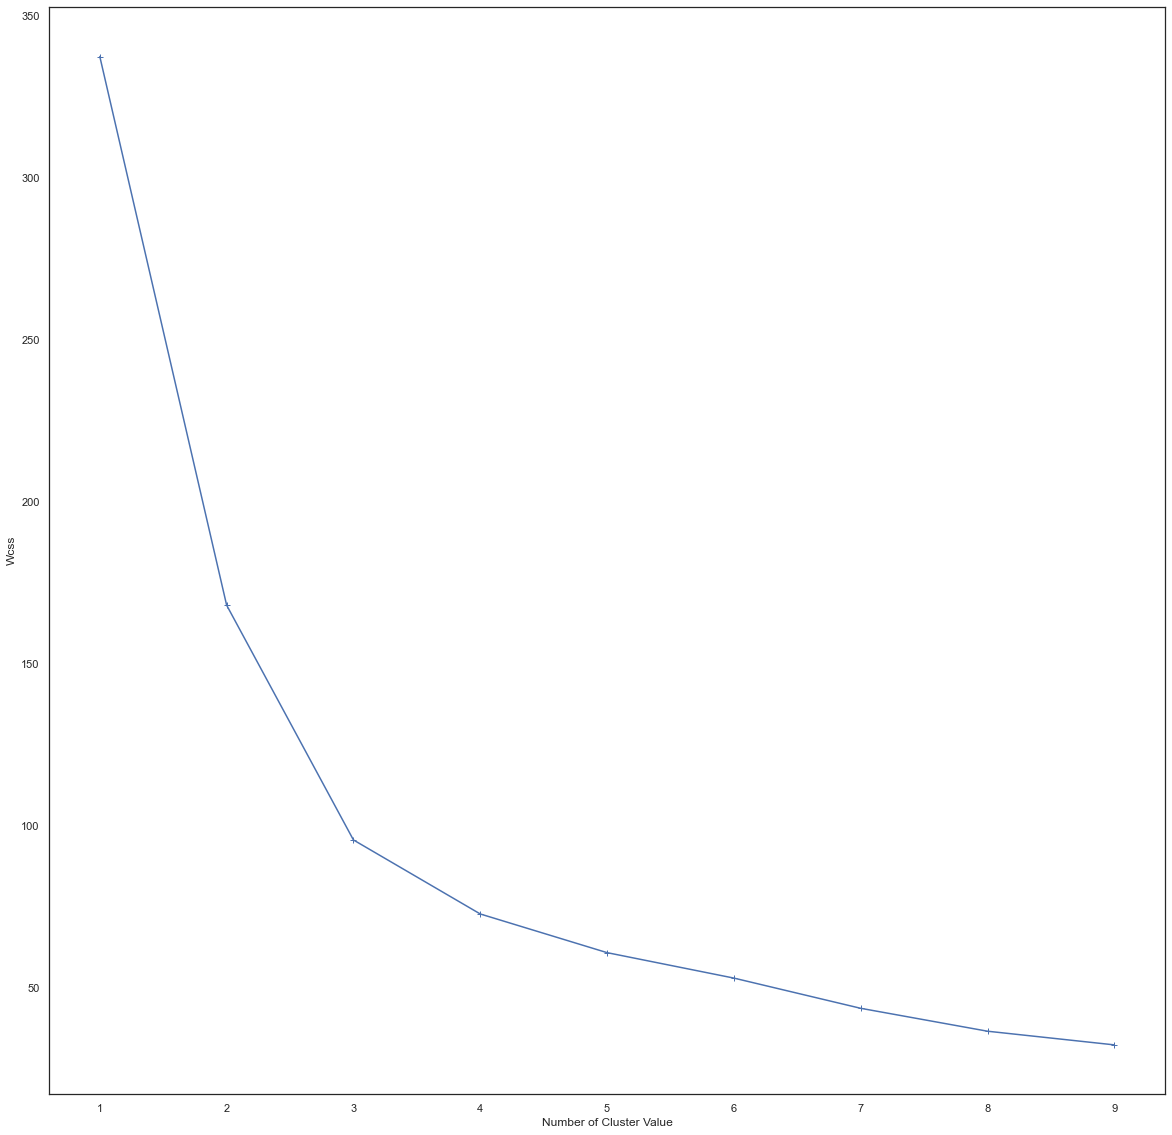

In [27]:
data2 = data.iloc[:, [0,1]]

from sklearn.cluster import KMeans

wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss, marker = '+')
plt.xlabel("Number of Cluster Value")
plt.ylabel("Wcss")
plt.show()

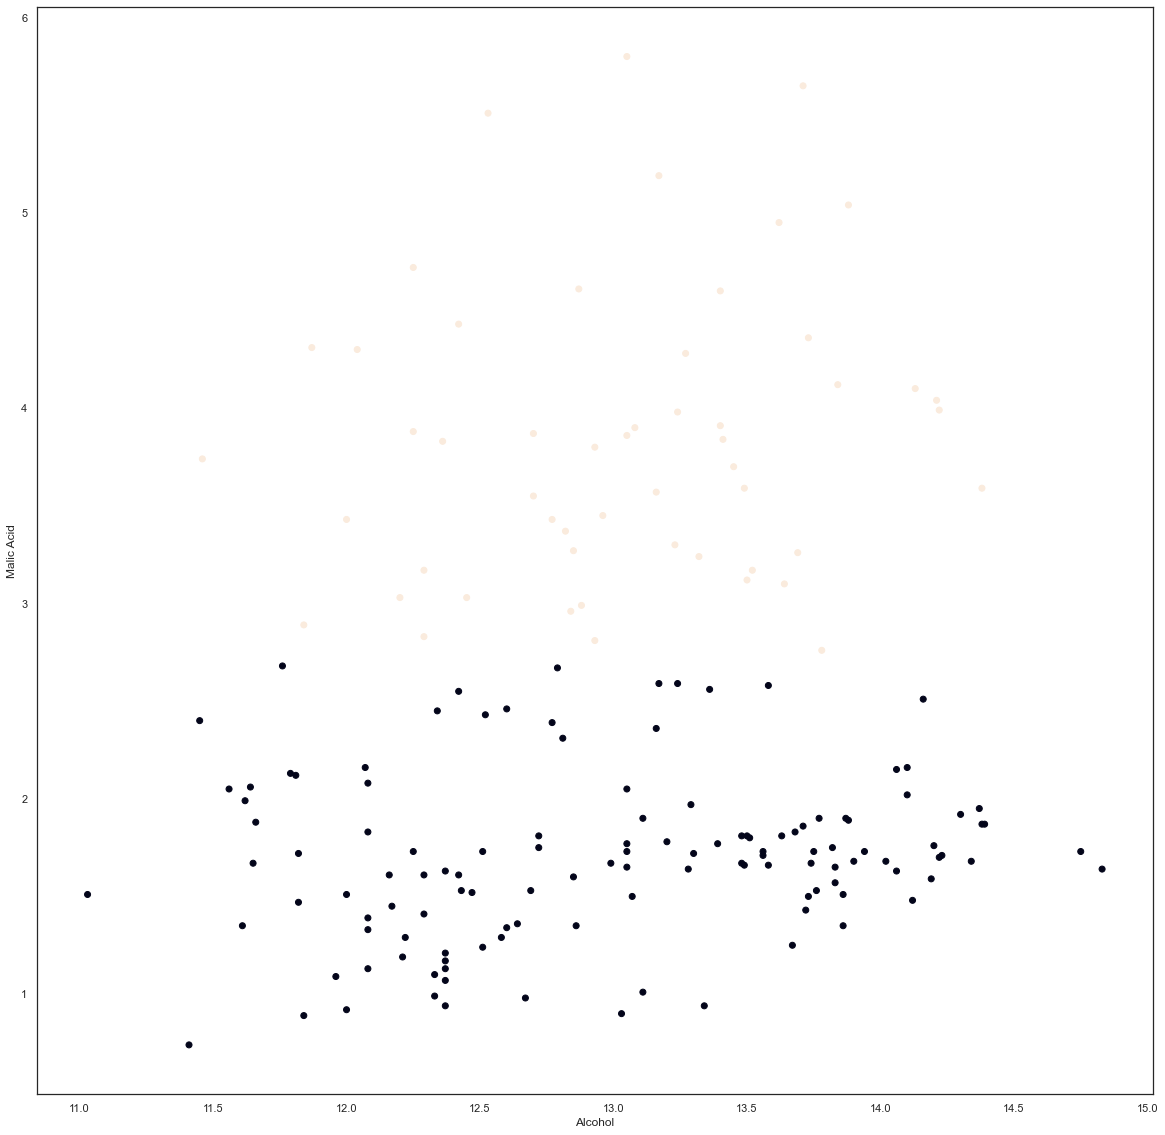

In [28]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)

plt.scatter(data2["Alcohol"],data2["Malic_Acid"], c = labels)
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.show()

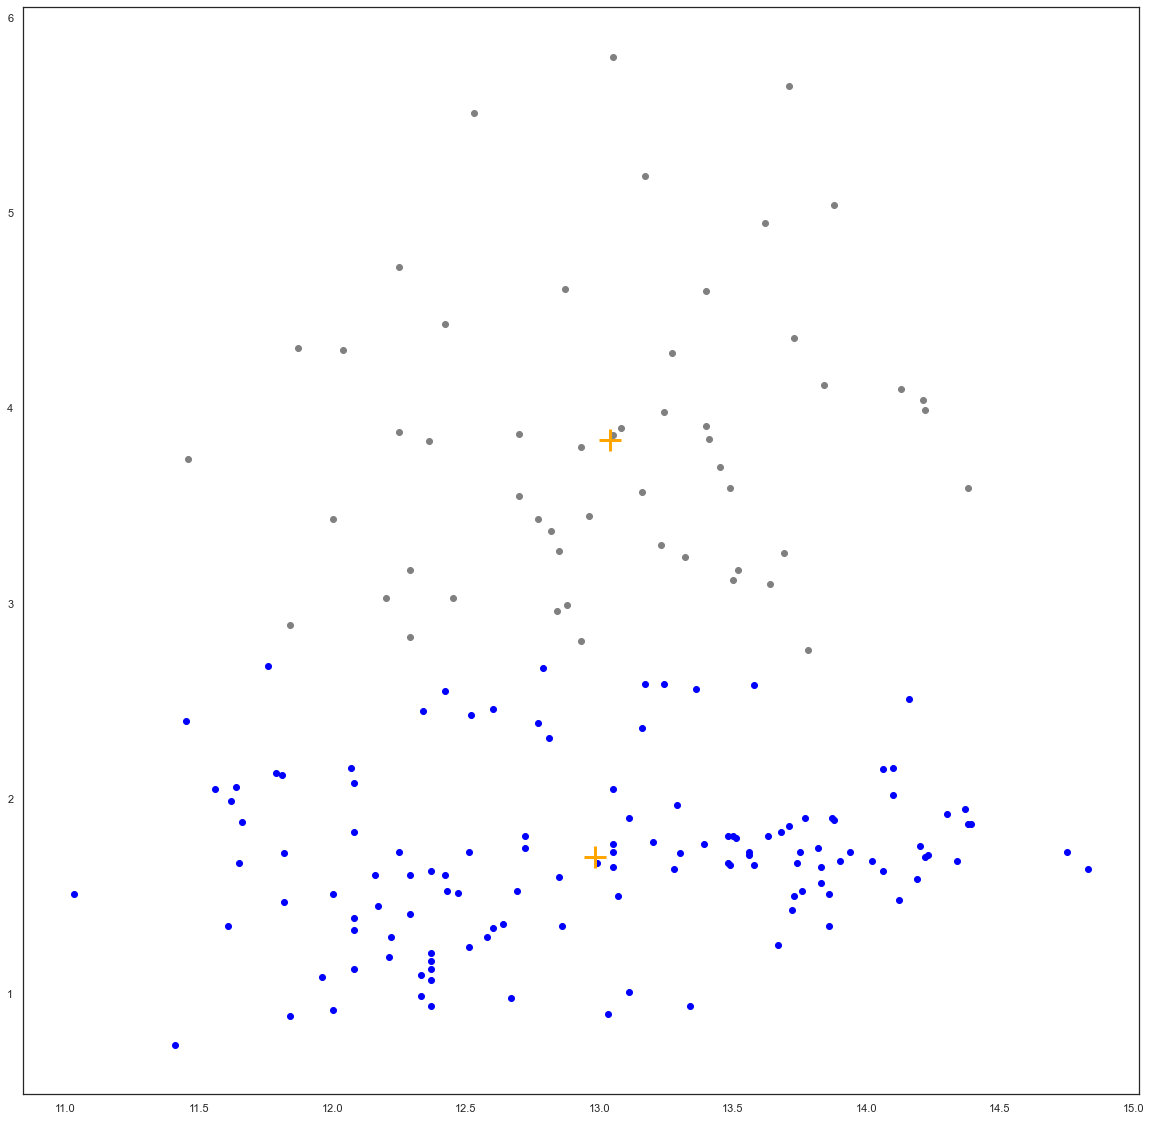

In [29]:
kmeans2 = KMeans(n_clusters=2)
clusters = kmeans2.fit_predict(data2)
data["label"] = clusters

plt.scatter(data.Alcohol[data.label == 0],data.Malic_Acid[data.label == 0 ],color="blue")
plt.scatter(data.Alcohol[data.label == 1],data.Malic_Acid[data.label == 1 ],color="grey")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="orange",marker="+",s=500,linewidths=3)
plt.show()

In [30]:
data3 = data.drop(["label"],axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels, "label" : data['label']})
ct = pd.crosstab(df['labels'],df['label'])
print(ct)

label    0   1
labels        
0       75  12
1       50  41


## Hierarchical Clustering

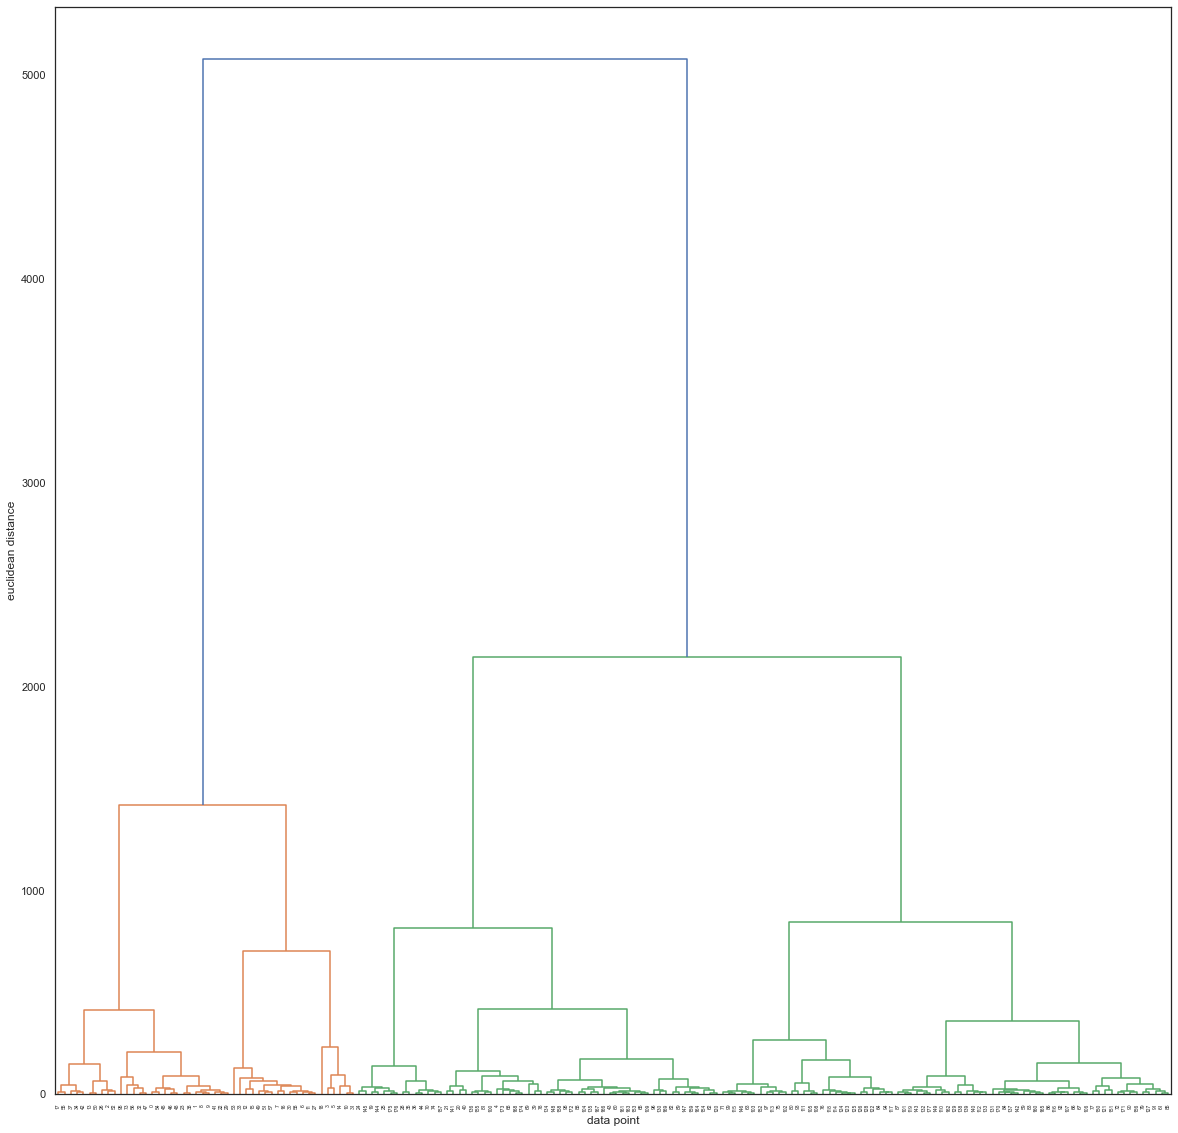

In [31]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data point")
plt.ylabel("euclidean distance")
plt.show()

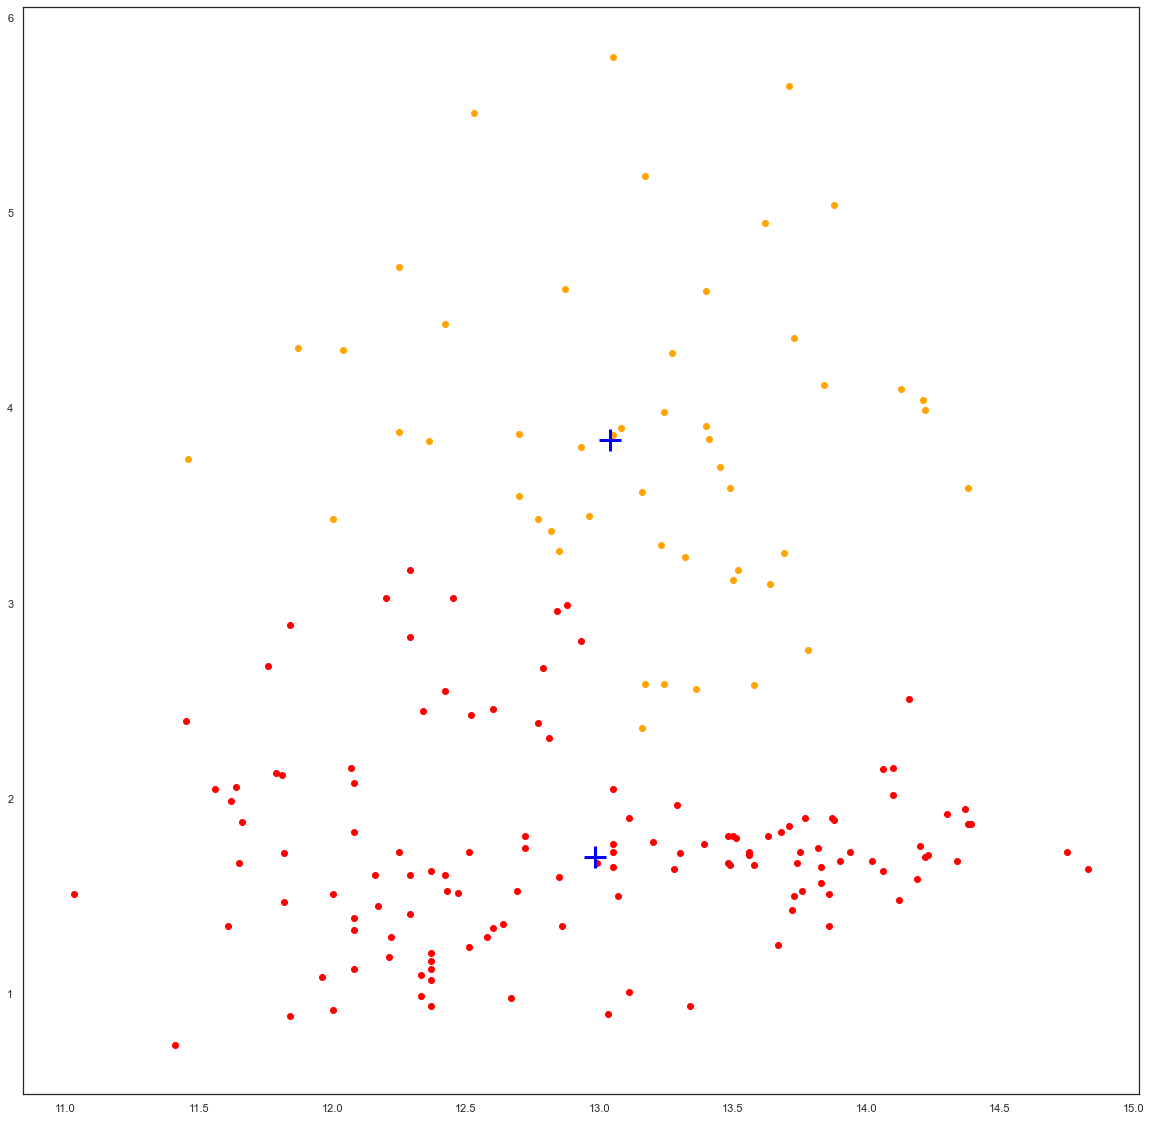

In [34]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(data2)

data["label"] = cluster
plt.scatter(data.Alcohol[data.label == 0],data.Malic_Acid[data.label == 0 ],color="red")
plt.scatter(data.Alcohol[data.label == 1],data.Malic_Acid[data.label == 1 ],color="orange")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="blue",marker="+",s=500,linewidths=3)
plt.show()
